<H3>Raman curve fit:</H3>
curve fit with 3 lorentz peaks of G, D, G' for CSV text outputs obtained by LabRam HR-800 <br>
2021.08.10 ver.0.1 by fur.    curve fit with LMFIT and shows fitting curves.<br>
2021.08.10 ver.0.11 by fur.    Get G/D area ratio, and G/D height ratio <br>
2021.08.10 ver.0.12 by fur.   File chooser only works for jupyter notebook using ipyfilechooser <br>
2022.09.13 ver.0.13 by fur.   StdErr evaluated in G/D height ratio <br>
2023.12.20 ver 0.14 by fur.   compornent l4 (at 1500cm-1) added to fit low G/D spectra <br>

<H4>References:<H4>
<OL>
    <LI>LMFIT, https://lmfit.github.io/lmfit-py/</LI>
    <LI>https://sabopy.com/py/lmfit-5/</LI>
    <LI>Multi peak fitting, emilyripka, https://github.com/emilyripka/BlogRepo/blob/master/181119_PeakFitting.ipynb</LI>
</OL>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib.pyplot as plt
import numpy as np
from lmfit import Model
from lmfit.lineshapes import lorentzian
from lmfit.models import LinearModel, LorentzianModel

In [2]:
#INFILE = "20210726MJ_MWI_28ul_std-D1.txt"
# with open(INFILE, "r") as f:
#     print(f.read())

In [7]:
from ipyfilechooser import FileChooser
# Create and displays a FileChooser widget
cwd = os.getcwd()
fc = FileChooser(cwd)
display(fc)

FileChooser(path='F:\src\ramanfit', filename='', title='', show_hidden=False, select_desc='Select', change_des…

In [156]:
INFILE = fc.selected
INFILE

'G:\\raman\\teruhira\\20231218\\txt\\231214b_25-2.txt'

In [157]:
data = np.loadtxt(INFILE, delimiter='\t')

In [158]:
print(data)

[[1000.       680.33344]
 [1000.1458   681.45734]
 [1000.2915   681.32837]
 ...
 [1799.7085   682.74463]
 [1799.8542   683.03473]
 [1800.       683.26251]]


In [159]:
x = data[:,0]
y = data[:,1]

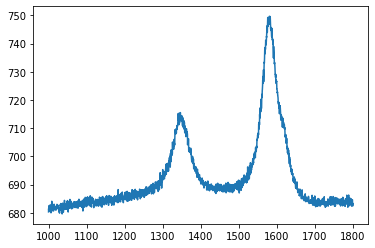

In [160]:
plt.plot(x,y);plt.show()

In [161]:
xDGindex1000=0
xDGindex1000=np.searchsorted(x,1000)
xDGindex1000

0

In [162]:
xDGindex1800=0
xDGindex1800=np.searchsorted(x,1800)
xDGindex1800

5489

In [163]:
xDG = data[xDGindex1000:xDGindex1800,0]
yDG = data[xDGindex1000:xDGindex1800,1]

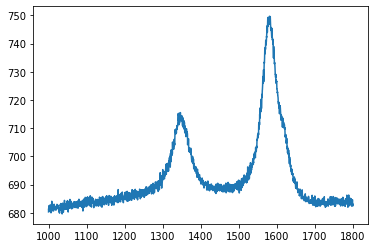

In [164]:
plt.plot(xDG,yDG);plt.show()

In [165]:
# LMFIT

In [166]:
bg = LinearModel(prefix='lin_')
pars = bg.guess(yDG, x=xDG)
#pars

In [167]:
lorentz1 = LorentzianModel(prefix='l1_')  # D peak
#pars = lorentz1.guess(yDG, x=xDG)
pars.update(lorentz1.make_params())
pars['l1_center'].set(value=1350, min=1300, max=1380)
pars['l1_sigma'].set(value=10, min=5)
pars['l1_amplitude'].set(value=10000, min=5)
#pars

In [168]:
lorentz2 = LorentzianModel(prefix='l2_')  # G peak
pars.update(lorentz2.make_params())

pars['l2_center'].set(value=1570, min=1520, max=1590)
pars['l2_sigma'].set(value=23, min=5)
pars['l2_amplitude'].set(value=20000, min=5)
#pars

In [169]:
lorentz3 = LorentzianModel(prefix='l3_') # G' peak
pars.update(lorentz3.make_params())

pars['l3_center'].set(value=1620, min=1600, max=1660)
pars['l3_sigma'].set(value=10, min=5, max=200)
pars['l3_amplitude'].set(value=1000, min=5, max=1500)
#pars

In [170]:
lorentz4 = LorentzianModel(prefix='l4_')
pars.update(lorentz4.make_params())

pars['l4_center'].set(value=1500, min=1450, max=1520)
pars['l4_sigma'].set(value=10, min=5, max=100)
pars['l4_amplitude'].set(value=1000, min=5)

In [171]:
mod = lorentz1 + lorentz2 + lorentz3 + lorentz4 + bg
init = mod.eval(pars, x=xDG)
out = mod.fit(yDG, pars, x=xDG)

In [172]:
print(out.fit_report())

[[Model]]
    ((((Model(lorentzian, prefix='l1_') + Model(lorentzian, prefix='l2_')) + Model(lorentzian, prefix='l3_')) + Model(lorentzian, prefix='l4_')) + Model(linear, prefix='lin_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 218
    # data points      = 5489
    # variables        = 14
    chi-square         = 7464.39465
    reduced chi-square = 1.36335975
    Akaike info crit   = 1715.30898
    Bayesian info crit = 1807.85599
[[Variables]]
    lin_slope:     -0.00137356 +/- 8.2707e-05 (6.02%) (init = 0.01595376)
    lin_intercept:  684.318663 +/- 0.11428465 (0.02%) (init = 670.0567)
    l1_amplitude:   2844.09636 +/- 39.7129711 (1.40%) (init = 10000)
    l1_center:      1347.20088 +/- 0.11328832 (0.01%) (init = 1350)
    l1_sigma:       30.9817800 +/- 0.30442154 (0.98%) (init = 10)
    l1_fwhm:        61.9635601 +/- 0.60884309 (0.98%) == '2.0000000*l1_sigma'
    l1_height:      29.2205298 +/- 0.17341968 (0.59%) == '0.3183099*l1_amplitude/max(1e-1

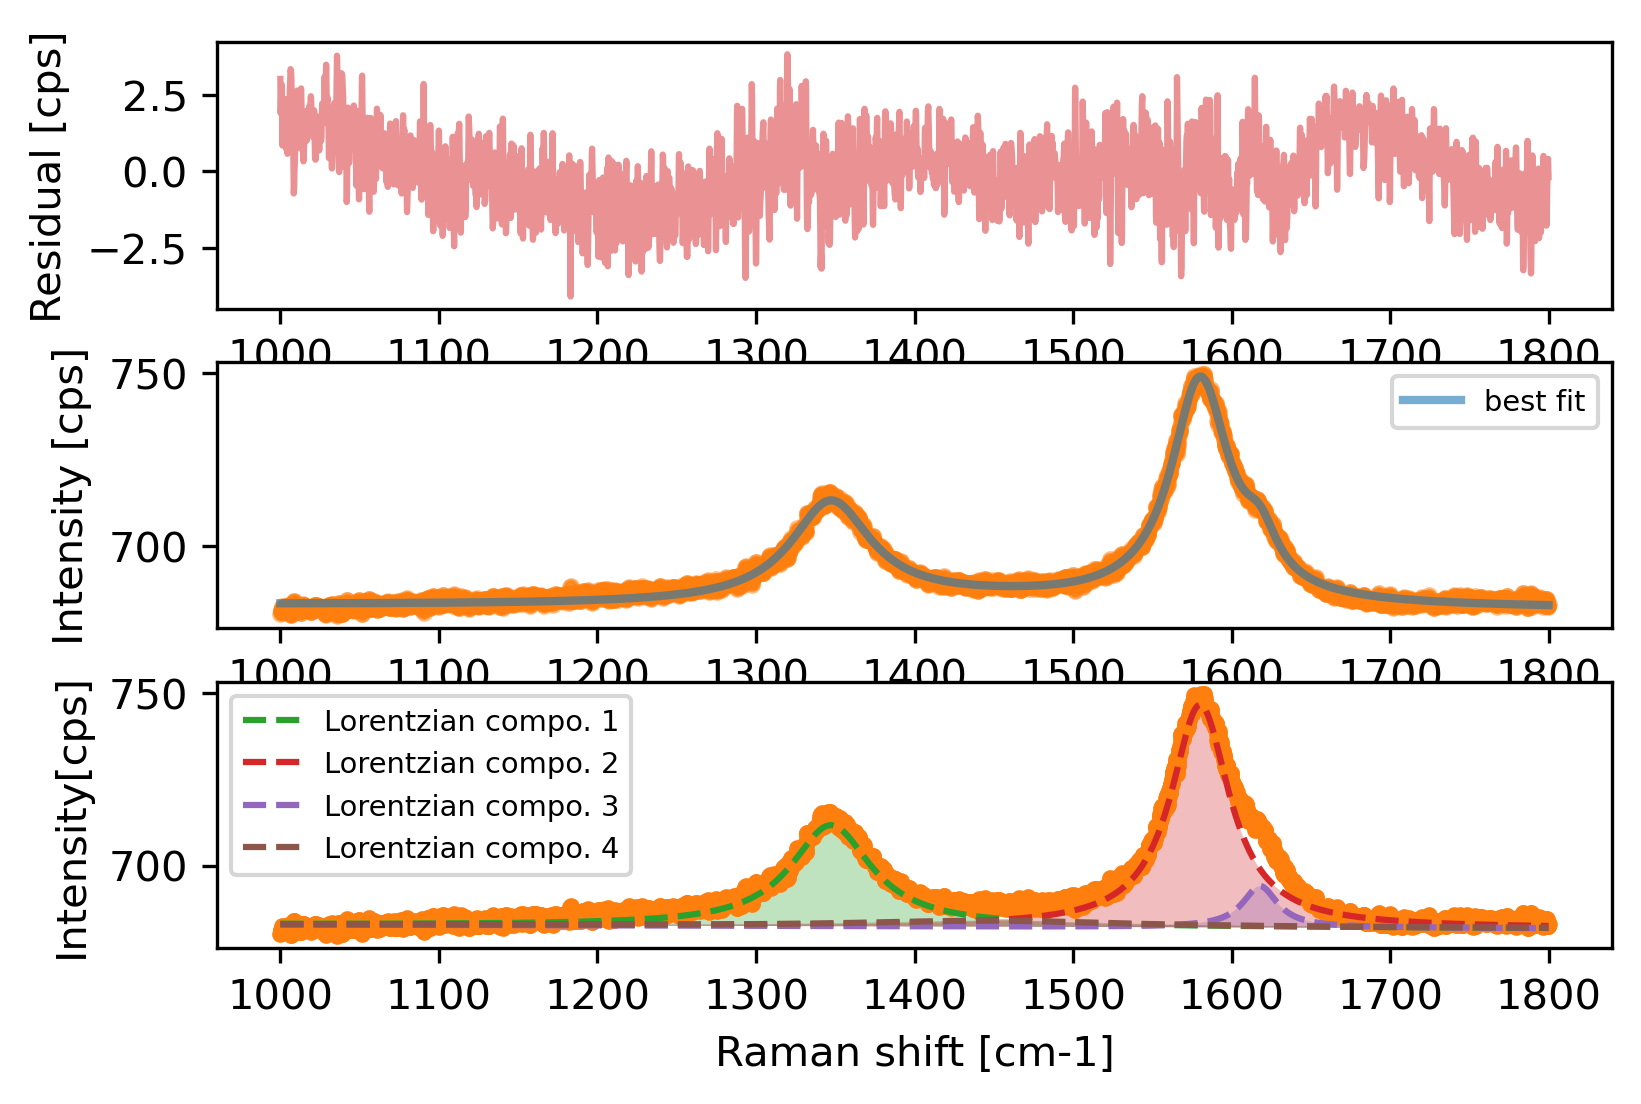

In [173]:
fig, ax = plt.subplots(3,1,dpi=300)
ax=ax.ravel()

ax[0].plot(xDG, out.best_fit - yDG, 'C3-', alpha=0.5)

ax[1].plot(xDG, yDG, 'C1.',alpha=0.5)
ax[1].plot(xDG, out.best_fit, '-', label='best fit',zorder=10,lw=2, alpha=0.6)

ax[2].plot(xDG, yDG, 'C1.')
comps = out.eval_components(x=xDG)
ax[2].plot(xDG, comps['l1_']+comps['lin_'], 'C2--', label='Lorentzian compo. 1')
ax[2].fill_between(xDG, comps['l1_']+comps['lin_'], comps['lin_'],facecolor='C2',alpha=0.3)
ax[2].plot(xDG, comps['l2_']+comps['lin_'], 'C3--', label='Lorentzian compo. 2')
ax[2].fill_between(xDG, comps['l2_']+comps['lin_'], comps['lin_'],facecolor='C3',alpha=0.3)
ax[2].plot(xDG, comps['l3_']+comps['lin_'], 'C4--', label='Lorentzian compo. 3')
ax[2].fill_between(xDG, comps['l3_']+comps['lin_'], comps['lin_'],facecolor='C4',alpha=0.3)
ax[2].plot(xDG, comps['l4_']+comps['lin_'], 'C5--', label='Lorentzian compo. 4')
ax[2].fill_between(xDG, comps['l4_']+comps['lin_'], comps['lin_'],facecolor='C5',alpha=0.3)

ax[0].set(xlabel="",ylabel="Residual [cps]")
ax[1].set(xlabel="",ylabel="Intensity [cps]")
ax[2].set(xlabel="Raman shift [cm-1]",ylabel="Intensity[cps]")
ax[1].legend(loc='best', fontsize='x-small')
ax[2].legend(loc='best', fontsize='x-small')

plt.savefig("ramfit.png",dpi=130)
plt.show()

In [174]:
for parname, param in out.params.items():
    print("%s = %f +/- %f " % (parname, param.value, param.stderr))

lin_slope = -0.001374 +/- 0.000083 
lin_intercept = 684.318663 +/- 0.114285 
l1_amplitude = 2844.096355 +/- 39.712971 
l1_center = 1347.200883 +/- 0.113288 
l1_sigma = 30.981780 +/- 0.304422 
l1_fwhm = 61.963560 +/- 0.608843 
l1_height = 29.220530 +/- 0.173420 
l2_amplitude = 4554.901246 +/- 27.554775 
l2_center = 1580.078212 +/- 0.059483 
l2_sigma = 22.521884 +/- 0.116524 
l2_fwhm = 45.043769 +/- 0.233048 
l2_height = 64.376059 +/- 0.140683 
l3_amplitude = 500.452628 +/- 15.289065 
l3_center = 1617.905010 +/- 0.199680 
l3_sigma = 13.297639 +/- 0.351925 
l3_fwhm = 26.595278 +/- 0.703850 
l3_height = 11.979497 +/- 0.175351 
l4_amplitude = 544.412006 +/- 119.971601 
l4_center = 1450.139299 +/- 7.366163 
l4_sigma = 99.999985 +/- 26.655791 
l4_fwhm = 199.999970 +/- 53.311582 
l4_height = 1.732918 +/- 0.839309 


In [175]:
od=out.params
l1_height_stderr=od['l1_height'].stderr
l2_height_stderr=od['l2_height'].stderr
vd = out.params.valuesdict()
#vd
l2_area = np.pi * vd['l2_amplitude'] * vd['l2_fwhm']
l1_area = np.pi * vd['l1_amplitude'] * vd['l1_fwhm']

In [176]:
GDAreaRatio = l2_area / l1_area

In [177]:
l1_height = vd['l1_height']
l2_height = vd['l2_height']

In [178]:
GDHeightRatio = l2_height / l1_height

In [179]:
GDHeightRatioMax = (l2_height + l2_height_stderr) / (l1_height - l1_height_stderr)
GDHeightRatioMin = (l2_height - l2_height_stderr) / (l1_height + l1_height_stderr)
GDHeightRatioPlus = GDHeightRatioMax - GDHeightRatio
GDHeightRatioMinus = GDHeightRatio - GDHeightRatioMin

In [180]:
GDHeightRatioPlus

0.017996479580403513

In [181]:
GDHeightRatioMinus

0.017784126783555898

// Results

In [182]:
INFILE

'G:\\raman\\teruhira\\20231218\\txt\\231214b_25-2.txt'

In [183]:
GDHeightRatio

2.203110617068967

In [184]:
GDAreaRatio

1.164214532639959

In [185]:
print(INFILE)
print("G/D Height Ratio = %f +/- %f" % (GDHeightRatio, GDHeightRatioPlus))
print("G/D Area Ratio = %f" % GDAreaRatio)

G:\raman\teruhira\20231218\txt\231214b_25-2.txt
G/D Height Ratio = 2.203111 +/- 0.017996
G/D Area Ratio = 1.164215
